In [90]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [91]:
data=pd.read_csv(r'C:\Users\User\Downloads\bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [92]:
data.dropna
for x in data:
    null_values=data[x].isin(["unknown"]).sum()
    if null_values!=0:
        print(x,'=',null_values)
data.shape

job = 38
education = 187
contact = 1324
poutcome = 3705


(4521, 17)

In [93]:
data=data[data['job']!='unknown']
data=data[data['education']!='unknown']
data=data[data['contact']!='unknown']
data=data[data['poutcome']!='unknown']
data.shape

(764, 17)

In [94]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,41.277487,1600.434555,14.585079,273.887435,2.037958,224.634817,3.019634
std,11.331024,2980.860786,7.814483,246.587595,1.590395,113.201111,2.939919
min,20.000000,-1400.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,33.000000,141.250000,7.750000,119.750000,1.000000,140.000000,1.000000
50%,38.000000,624.500000,14.000000,203.000000,1.000000,190.000000,2.000000
75%,48.000000,1648.750000,19.250000,332.000000,2.000000,329.250000,4.000000
max,86.000000,26306.000000,31.000000,1579.000000,11.000000,871.000000,25.000000


In [95]:
data.y.value_counts()

no     593
yes    171
Name: y, dtype: int64

no: 0.776178010471
yes: 0.223821989529


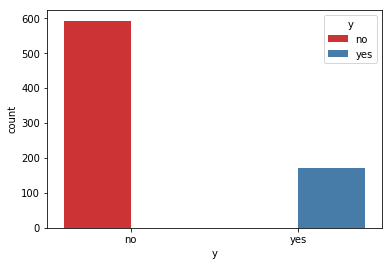

In [96]:
#check if the two classes are balanced
print('no:',data["y"].value_counts()[0] / data.shape[0])
print('yes:',data["y"].value_counts()[1] / data.shape[0])
sns.countplot(x='y',data=data, hue="y",palette="Set1")
plt.show()

In [97]:
import numpy as np
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,13,7,1,1,0,540,1,1,0,10,8,184,0,222,3,0,0
2,15,4,2,2,0,385,1,0,0,15,0,152,0,213,0,0,0
5,15,4,2,2,0,281,0,0,0,22,3,112,1,105,2,0,0
6,16,6,1,2,0,166,1,0,0,13,8,270,0,213,1,1,0
9,23,7,1,0,0,24,1,1,0,16,0,250,0,80,1,0,0


In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
array = data.values
X = array[:,0:14]
Y = array[:,14]
rfe = RFE(model)
fit = rfe.fit(X, Y)
i=0
feature=list()
print('Num Features:',fit.n_features_)
for x,y in zip(fit.support_,data):
    if x:
        feature.append(y)
print("Feature Ranking:",fit.ranking_)
print("Selected Features:",feature)

Num Features: 7
Feature Ranking: [6 1 1 1 2 5 1 1 1 4 7 3 1 8]
Selected Features: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign']


In [99]:
drop_elements = ['age','default','balance','day', 'month', 'duration','pdays', 'previous', 'poutcome', 'y']
y = data["y"]
X = data.drop(drop_elements, axis=1)
X.head()

,job,marital,education,housing,loan,contact,campaign
1,7,1,1,1,1,0,0
2,4,2,2,1,0,0,0
5,4,2,2,0,0,0,1
6,6,1,2,1,0,0,0
9,7,1,0,1,1,0,0


In [100]:
# Logistic Regression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.823529411765


In [101]:

y_pred = logreg.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[126   0]
 [ 27   0]]


In [103]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90       126
          1       0.00      0.00      0.00        27

avg / total       0.68      0.82      0.74       153



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


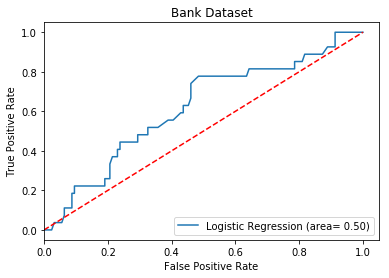

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area= %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Bank Dataset')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()